          0         1         2             3         4      beta  intercept  \
0  0.662052 -4.411376  0.553790  2.281365e-09  0.100554  0.662052  -4.411376   
1  0.146849 -1.759434  0.114951  2.547711e-01  0.128191  0.146849  -1.759434   
2  0.929502 -3.687694  0.636575  1.092475e-12  0.113753  0.929502  -3.687694   
3 -0.049329  2.905114 -0.207241  3.855764e-02  0.023522 -0.049329   2.905114   
4 -0.466742 -3.150491 -0.838953  1.214125e-27  0.030583 -0.466742  -3.150491   

    r_value       p_value  std_error  
0  0.553790  2.281365e-09   0.100554  
1  0.114951  2.547711e-01   0.128191  
2  0.636575  1.092475e-12   0.113753  
3 -0.207241  3.855764e-02   0.023522  
4 -0.838953  1.214125e-27   0.030583  


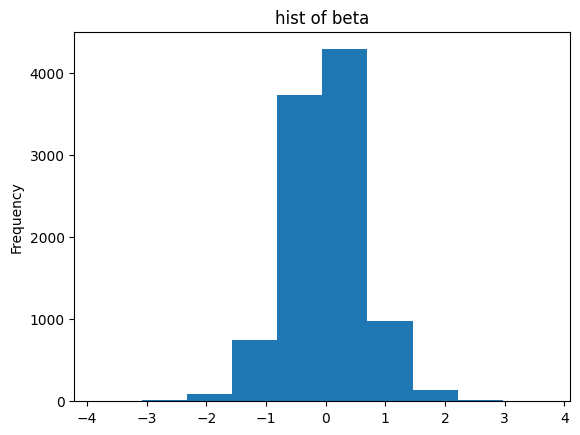

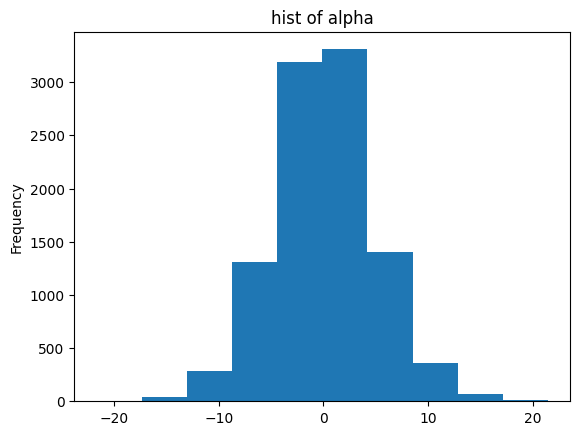

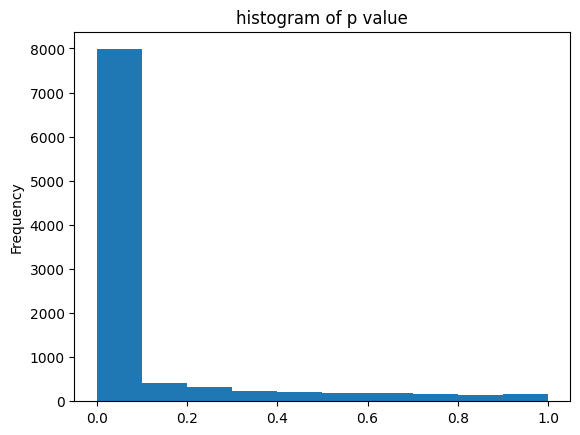

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Set the number of steps and simulations
num_steps = 100
num_simulations = 10000
# Create an array to store terminal values

zero_data = np.zeros(shape=(num_simulations,5))
terminal_values = pd.DataFrame(zero_data)


# Perform simulations
for i in range(num_simulations):
    # Generate standard normal innovations for each step
    innovationsx = np.random.standard_normal(num_steps)
    innovationsy = np.random.standard_normal(num_steps)
    # Calculate the cumulative sum to simulate the random walk
    random_walkx = np.cumsum(innovationsx)
    random_walky = np.cumsum(innovationsy)
    # Store the terminal value after 100 steps
    slope, intercept, r_value, p_value, std_err = stats.linregress(random_walkx, random_walky)

    terminal_values[0][i] = slope
    terminal_values[1][i] = intercept
    terminal_values[2][i] = r_value
    terminal_values[3][i] = p_value
    terminal_values[4][i] = std_err


terminal_values['beta'] = terminal_values[0]
terminal_values['intercept'] = terminal_values[1]
terminal_values['r_value'] = terminal_values[2]
terminal_values['p_value'] = terminal_values[3]
terminal_values['std_error'] = terminal_values[4]
# Calculate mean, median, and standard deviation of terminal values

print(terminal_values.head())
terminal_values.beta.plot(kind='hist')
plt.title('hist of beta')
plt.show()
plt.title('hist of alpha')
terminal_values.intercept.plot(kind='hist')
plt.show()
plt.title('histogram of p value')
terminal_values.p_value.plot(kind='hist')
plt.show()



#mean_terminal = np.mean(terminal_values['beta'])

#median_terminal = np.median(terminal_values)
#std_dev_terminal = np.std(terminal_values)

# Print the results

